<a href="https://colab.research.google.com/github/ankita9500/Pandas/blob/main/BackOrder_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement:
Backorders are unavoidable, but by anticipating which things will be backordered,
planning can be streamlined at several levels, preventing unexpected strain on
production, logistics, and transportation. ERP systems generate a lot of data (mainly
structured) and also contain a lot of historical data; if this data can be properly utilized, a
predictive model to forecast backorders and plan accordingly can be constructed.
Based on past data from inventories, supply chain, and sales, classify the products as
going into backorder (Yes or No).


In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

##What is Backorder ?
* A backorder is an order for a good or service that cannot be filled at the current time due to a lack of available supply. The item may not be held in the company's available inventory but could still be in production, or the company may need to still manufacture more of the product. Backorders are an indication that demand for a company's product outweighs its supply.<br>




##Key Takeaways<br>
* A backorder is an order for a good or service that cannot be filled immediately because of a lack of available supply.
* Backorders give insight into a company's inventory management. A manageable backorder with a short turnaround is a net positive, but a large backorder with longer wait times can be problematic.
* Companies with manageable backorders tend to have high demand, while those that can't keep up may lose customers.
* However, backorders allow for a company to maintain lower levels of inventory, have lower risk of obsolesce and theft, and may result in natural marketing for its highly demanded product.
* Popular products in high demand (i.e. next generation gaming consoles or new iterations of cell phones) may experience backorders.

#Data Description <br>
**• sku** - Random product(sku) code <br>
**• national_inv**  - Current inventory level of that sku <br>
**• lead_time** - Transit time for product(if available at source)  <br>
**• in_transit_qty** - Quantity in transit from source <br>
**• forecast_x_month** - Forecast sales for the net 3, 6, 9 months <br>
**• sales_x_month** - Sales quantity for the prior 1, 3, 6, 9 months <br>
**• min_bank** - Minimum recommended amount to stock <br>
**• potential_issue** - Indictor variable noting potential issue with item <br>
**• pieces_past_due** - Parts overdue from source <br>
**• perf_x_months_avg** - Source performance in the last 6 and 12 months <br>
**• local_bo_qty** - Amount of stock orders overdue <br>
**• deck_risk** – Part risk flag<br>
**• oe_constraint** – Part risk flag<br>
**• ppap_risk** – Part risk flag<br>
**• stop_auto_buy** – Part risk flag<br>
**• rev_stop** – Part risk flag<br>
**• went_on_backorder** - Product went on backorder <br>

## Get the Data
Welcome to Backorder Machine Learning Prediction Project !! Our task will be , to predict whether the products will go on backorder or not .

## Download the Data

In [ ]:
##imports
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:

##Link to download test dataset is https://drive.google.com/file/d/1ABbfz7MjPLj2taxUxwsWxXgYsH-TnBNV/view?usp=share_link
##Link to download train dataset is https://drive.google.com/file/d/1CTiyE6BZlDK-UNYUuuT8FXszBvuT9luS/view?usp=share_link
df_test = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Test_Dataset_v2.csv")
df_train = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Training_Dataset_v2.csv")

<ipython-input-178-f1ce5a0aaacc>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Test_Dataset_v2.csv")
<ipython-input-178-f1ce5a0aaacc>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r"/content/drive/MyDrive/bo project data/dataset/Kaggle_Training_Dataset_v2.csv")


# Take a Quick Look at the Data Structure

In [ ]:
df_train.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

There are 8 categorical columns (including target column) and 15 numerical columns <br>

Total Number of records are 242076.<br>
We  have some missing values in some of its features , we will deal with it later.


In [ ]:
df_train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [ ]:

df_train.shape

(1687861, 23)

Lets go through test dataset

In [ ]:
df_test.shape

(242076, 23)

There might be chances that train/test data samples are separated using random sampling method as we have not separated data by ourselves, so to improve accuracy of model we will merge both dataset , and create test set again for our model evaluation and see accuracy. After that we will again test with original test dataset(we are provided by company) as realworld data.

In [ ]:
df = pd.concat([df_train, df_test ], axis = 0 )

In [ ]:
df.shape

(1929937, 23)

In [ ]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [ ]:
df.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [ ]:
## summarise numerical data
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


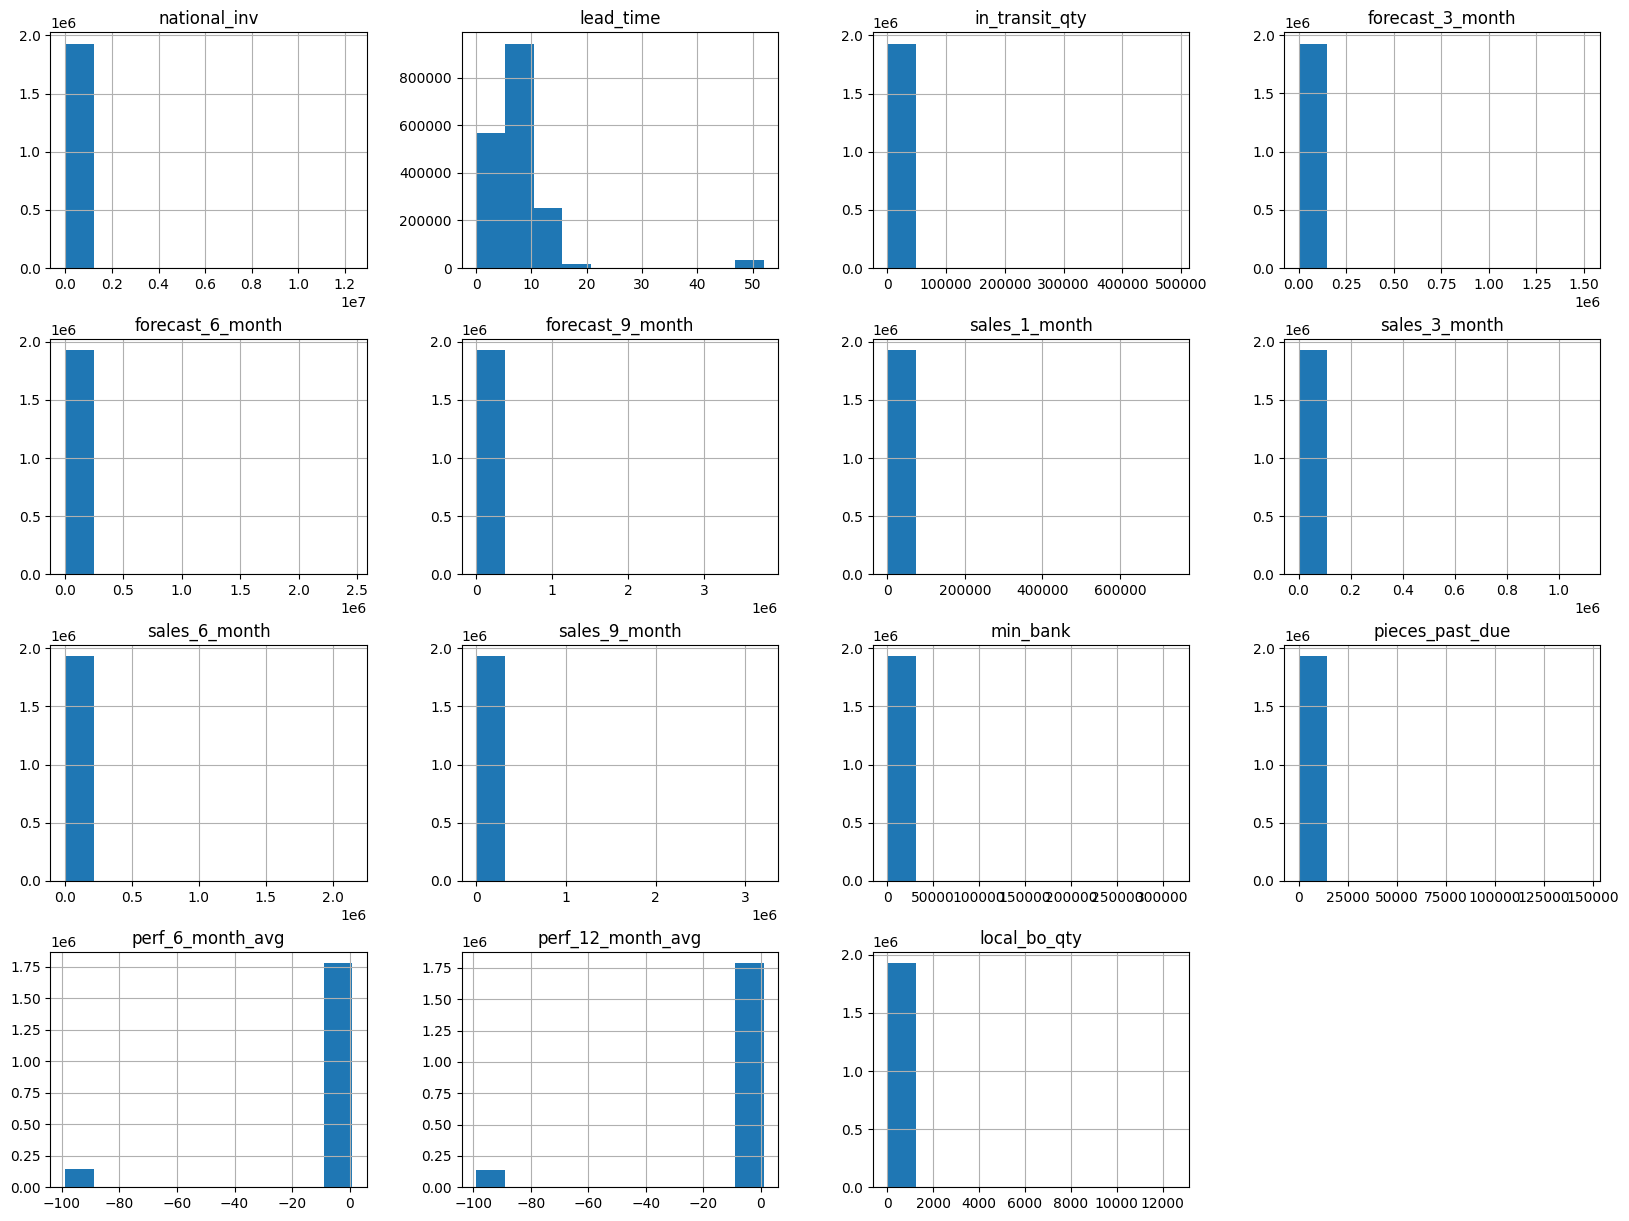

In [ ]:

df.hist( bins = 10, figsize=(20,15))
plt.show()

In [ ]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

# Lets Start EDA

In [ ]:
df['went_on_backorder'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['went_on_backorder'].value_counts()

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

In [ ]:
df.went_on_backorder.value_counts(normalize=True)

No     0.992756
Yes    0.007244
Name: went_on_backorder, dtype: float64

Out of 1929937 records, only 13981 sku are backordered, it is only 0.7% and more than 99.3% is in stock.

<Axes: >

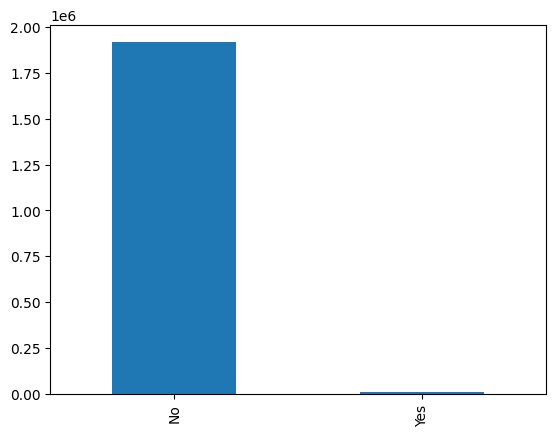

In [ ]:
df['went_on_backorder'].value_counts().plot(kind= 'bar')

In [ ]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

sku                       0
national_inv              2
lead_time            115619
in_transit_qty            2
forecast_3_month          2
forecast_6_month          2
forecast_9_month          2
sales_1_month             2
sales_3_month             2
sales_6_month             2
sales_9_month             2
min_bank                  2
potential_issue           2
pieces_past_due           2
perf_6_month_avg          2
perf_12_month_avg         2
local_bo_qty              2
deck_risk                 2
oe_constraint             2
ppap_risk                 2
stop_auto_buy             2
rev_stop                  2
went_on_backorder         2
dtype: int64

In [ ]:
round(df.isnull().sum()/df.isnull().count()*100,1).sort_values(ascending=False)

lead_time            6.0
sku                  0.0
potential_issue      0.0
rev_stop             0.0
stop_auto_buy        0.0
ppap_risk            0.0
oe_constraint        0.0
deck_risk            0.0
local_bo_qty         0.0
perf_12_month_avg    0.0
perf_6_month_avg     0.0
pieces_past_due      0.0
min_bank             0.0
national_inv         0.0
sales_9_month        0.0
sales_6_month        0.0
sales_3_month        0.0
sales_1_month        0.0
forecast_9_month     0.0
forecast_6_month     0.0
forecast_3_month     0.0
in_transit_qty       0.0
went_on_backorder    0.0
dtype: float64

####Observations :
1.We can see , there is issue with last record in dataset, we will remove that record.<br>
2.Features are having different scales , we need to convert it to same scales<br>
3.We can drop current index , and set sku as index.<br>
4.We will use OneHotEncoder for categorical columns<br>
5.We will work on missing values<br>
6.lead_time has most missing values i.e
 6% of the dataset
7.Only 0.7 sku's are backordered.


## Create Train and test set

In [ ]:
# before splitting dataset lets drop last record.
df= df[:-1]

In [ ]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242070,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [ ]:
# ## Separate Target Varibale first
X  = df.drop('went_on_backorder', axis = 1)
y = df['went_on_backorder']
print(df.shape, X.shape , y.shape)


(1929936, 23) (1929936, 22) (1929936,)


In [ ]:
X_train , X_test , y_train , y_test  = train_test_split(X, y , random_state = 77, test_size = 0.2)
print(X_train.shape , X_test.shape , y_train.shape, y_test.shape)

(1543948, 22) (385988, 22) (1543948,) (385988,)


In [ ]:
X_train.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [ ]:
y_train

247848     No
26051      No
1611183    No
1642494    No
357370     No
           ..
1263851    No
1501140    No
454228     No
598623     No
703191     No
Name: went_on_backorder, Length: 1543948, dtype: object

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543948 entries, 247848 to 703191
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1543948 non-null  object 
 1   national_inv       1543947 non-null  float64
 2   lead_time          1451398 non-null  float64
 3   in_transit_qty     1543947 non-null  float64
 4   forecast_3_month   1543947 non-null  float64
 5   forecast_6_month   1543947 non-null  float64
 6   forecast_9_month   1543947 non-null  float64
 7   sales_1_month      1543947 non-null  float64
 8   sales_3_month      1543947 non-null  float64
 9   sales_6_month      1543947 non-null  float64
 10  sales_9_month      1543947 non-null  float64
 11  min_bank           1543947 non-null  float64
 12  potential_issue    1543947 non-null  object 
 13  pieces_past_due    1543947 non-null  float64
 14  perf_6_month_avg   1543947 non-null  float64
 15  perf_12_month_avg  1543947 n

# Lets start feature engineering


In [ ]:
X_train.set_index('sku', inplace=True)

In [ ]:
X_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
1595832,4.0,8.0,0.0,1.0,3.0,5.0,0.0,2.0,4.0,5.0,0.0,No,0.0,0.79,0.66,0.0,No,No,No,Yes,No
1137539,14.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,No,0.0,0.69,0.68,0.0,Yes,No,No,Yes,No
3207847,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No
3240458,246.0,8.0,44.0,88.0,256.0,455.0,40.0,156.0,348.0,503.0,63.0,No,0.0,0.87,0.88,0.0,No,No,No,Yes,No
1705321,154.0,2.0,154.0,566.0,995.0,1390.0,185.0,559.0,1023.0,1560.0,163.0,No,0.0,0.86,0.91,0.0,No,No,Yes,Yes,No


In [ ]:
##lets handle missing values
X_train.isnull().sum()

national_inv             1
lead_time            92550
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
dtype: int64

<Axes: >

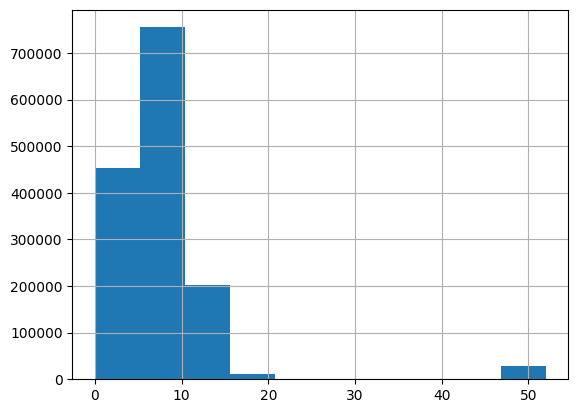

In [ ]:
X_train['lead_time'].hist()

In [ ]:
# as distribution is right skewed , we will replace nan values with median
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values= np.nan , strategy='median')
imp_median.fit_transform(X_train.select_dtypes(include= 'number'))



array([[ 4.  ,  8.  ,  0.  , ...,  0.79,  0.66,  0.  ],
       [14.  ,  4.  ,  0.  , ...,  0.69,  0.68,  0.  ],
       [ 5.  ,  9.  ,  0.  , ...,  0.99,  0.99,  0.  ],
       ...,
       [60.  ,  2.  ,  0.  , ...,  0.97,  0.94,  0.  ],
       [45.  ,  8.  , 15.  , ...,  0.81,  0.87,  0.  ],
       [ 2.  ,  3.  ,  0.  , ...,  0.89,  0.9 ,  0.  ]])

In [ ]:
X_train.isnull().sum()

national_inv             1
lead_time            92550
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
dtype: int64

In [ ]:
X_train.dropna(axis=0, inplace = True)

In [ ]:
X_train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
dtype: int64

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
# X_train["lead_time"].hist(ax=axs[0], bins=50)
# X_train["lead_time"].apply(np.log).hist(ax=axs[1], bins=50)
# axs[0].set_xlabel("Population")
# axs[1].set_xlabel("Log of population")
# axs[0].set_ylabel("Number of districts")
# plt.show()

In [ ]:
# X_train['lead_time'].apply(np.log).hist()

In [ ]:
num_columns= X_train.select_dtypes(include='number').columns

In [ ]:
cat_columns = X_train.select_dtypes(include='O').columns

In [ ]:
X_train[num_columns]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
1595832,4.0,8.0,0.0,1.0,3.0,5.0,0.0,2.0,4.0,5.0,0.0,0.0,0.79,0.66,0.0
1137539,14.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.69,0.68,0.0
3207847,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.99,0.99,0.0
3240458,246.0,8.0,44.0,88.0,256.0,455.0,40.0,156.0,348.0,503.0,63.0,0.0,0.87,0.88,0.0
1705321,154.0,2.0,154.0,566.0,995.0,1390.0,185.0,559.0,1023.0,1560.0,163.0,0.0,0.86,0.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846369,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,0.66,0.0
3093418,259.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96,0.96,0.0
1802209,60.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.97,0.94,0.0


In [ ]:
X_train[cat_columns]

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,
1595832,No,No,No,No,Yes,No
1137539,No,Yes,No,No,Yes,No
3207847,No,No,No,No,Yes,No
3240458,No,No,No,No,Yes,No
1705321,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...
2846369,No,No,No,No,Yes,No
3093418,No,No,No,No,Yes,No
1802209,No,No,No,No,Yes,No


In [ ]:
#Lets use StandardScaler for Numerical Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_scaled_data = sc.fit_transform(X_train[num_columns])

In [ ]:
num_scaled_data

array([[-0.01496761,  0.01796799, -0.03538205, ...,  0.13652881,
         0.10638921, -0.01837576],
       [-0.01466635, -0.54983983, -0.03538205, ...,  0.1290218 ,
         0.10813151, -0.01837576],
       [-0.01493748,  0.15991994, -0.03538205, ...,  0.15154283,
         0.13513715, -0.01837576],
       ...,
       [-0.01328055, -0.83374374, -0.03538205, ...,  0.15004143,
         0.1307814 , -0.01837576],
       [-0.01373244,  0.01796799, -0.02342093, ...,  0.13803021,
         0.12468335, -0.01837576],
       [-0.01502786, -0.69179179, -0.03538205, ...,  0.14403582,
         0.1272968 , -0.01837576]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output= False)
ohe.fit(X_train[cat_columns])

OneHotEncoder(sparse_output=False)

In [ ]:
cat_scaled_data = ohe.transform(X_train[cat_columns])



In [ ]:
cat_df = pd.DataFrame(cat_scaled_data , columns = ohe.get_feature_names_out(),
                      index = X_train.index)


In [ ]:
cat_df.head()

,potential_issue_No,potential_issue_Yes,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
sku,,,,,,,,,,,,
1595832,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1137539,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3207847,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3240458,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1705321,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
num_df = pd.DataFrame(num_scaled_data, columns = sc.get_feature_names_out(),
                      index = X_train.index)

In [ ]:
num_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
1595832,-0.014968,0.017968,-0.035382,-0.036852,-0.036821,-0.036994,-0.030877,-0.036219,-0.037056,-0.036520,-0.047657,-0.008886,0.136529,0.106389,-0.018376
1137539,-0.014666,-0.549840,-0.035382,-0.037049,-0.037128,-0.037344,-0.030877,-0.036425,-0.037376,-0.036792,-0.047657,-0.008886,0.129022,0.108132,-0.018376
3207847,-0.014937,0.159920,-0.035382,-0.037049,-0.037128,-0.037344,-0.030877,-0.036631,-0.037483,-0.036792,-0.047657,-0.008886,0.151543,0.135137,-0.018376
3240458,-0.007677,0.017968,-0.000296,-0.019708,-0.010977,-0.005466,-0.008971,-0.004528,-0.000368,-0.002671,0.008771,-0.008886,0.142534,0.125555,-0.018376
1705321,-0.010449,-0.833744,0.087419,0.074484,0.064512,0.060042,0.070441,0.078404,0.071621,0.069173,0.098340,-0.008886,0.141784,0.128168,-0.018376


In [ ]:
df_transformed = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
df_transformed.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_No,potential_issue_Yes,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
sku,,,,,,,,,,,,,,,,,,,,,,,,,,,
1595832,-0.014968,0.017968,-0.035382,-0.036852,-0.036821,-0.036994,-0.030877,-0.036219,-0.037056,-0.036520,-0.047657,-0.008886,0.136529,0.106389,-0.018376,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1137539,-0.014666,-0.549840,-0.035382,-0.037049,-0.037128,-0.037344,-0.030877,-0.036425,-0.037376,-0.036792,-0.047657,-0.008886,0.129022,0.108132,-0.018376,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3207847,-0.014937,0.159920,-0.035382,-0.037049,-0.037128,-0.037344,-0.030877,-0.036631,-0.037483,-0.036792,-0.047657,-0.008886,0.151543,0.135137,-0.018376,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3240458,-0.007677,0.017968,-0.000296,-0.019708,-0.010977,-0.005466,-0.008971,-0.004528,-0.000368,-0.002671,0.008771,-0.008886,0.142534,0.125555,-0.018376,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1705321,-0.010449,-0.833744,0.087419,0.074484,0.064512,0.060042,0.070441,0.078404,0.071621,0.069173,0.098340,-0.008886,0.141784,0.128168,-0.018376,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


<Axes: >

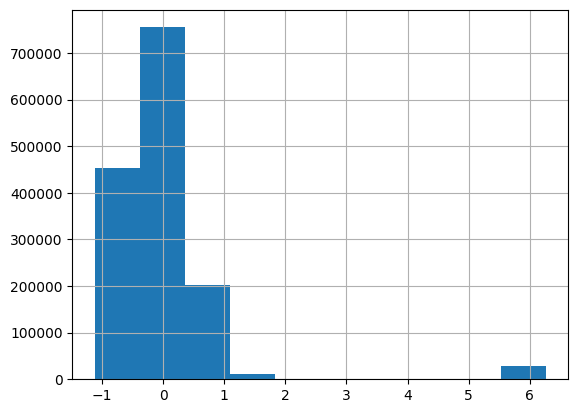

In [ ]:
df_transformed['lead_time'].hist()

<Axes: >

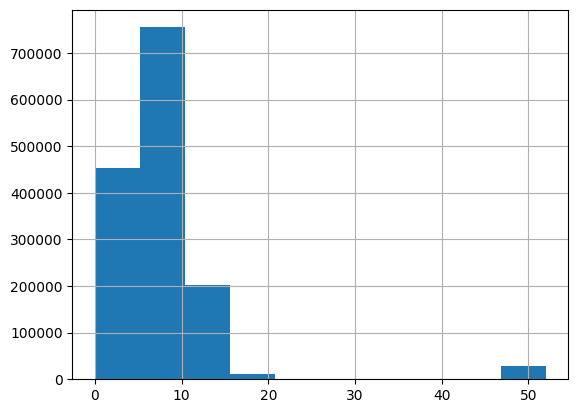

In [ ]:
X_train['lead_time'].hist()

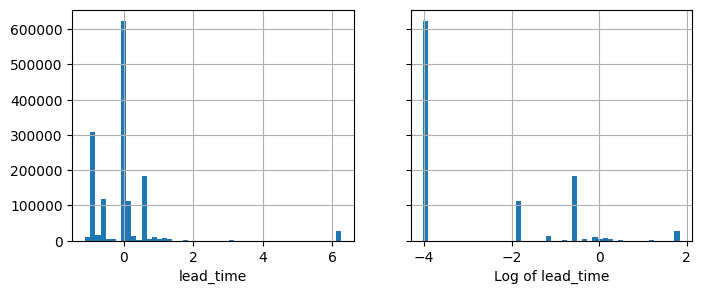

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_transformed['lead_time'].hist(ax=axs[0], bins=50)
df_transformed['lead_time'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("lead_time")
axs[1].set_xlabel("Log of lead_time")
plt.show()



###Lets find out correlations

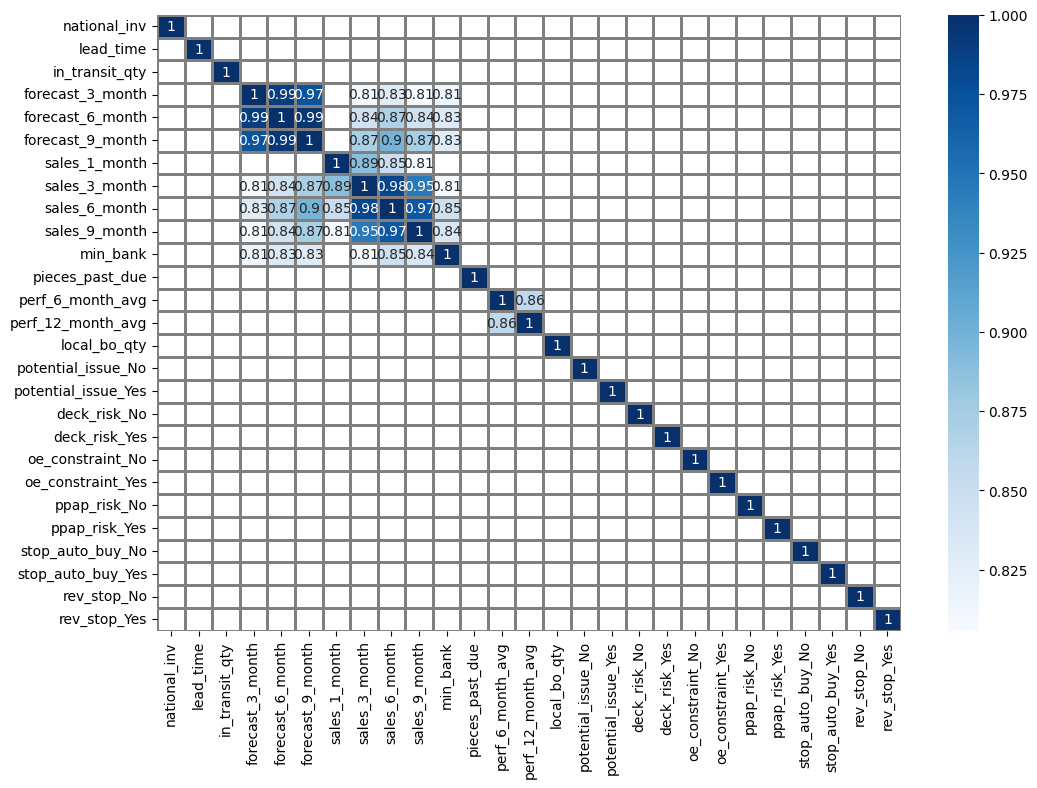

In [ ]:
plt.figure(figsize= (12,8))
cor = df_transformed.corr()
mask = cor<0.8
sns.heatmap(cor,mask = mask ,  annot=True,
            linewidths = 2, linecolor= 'grey' , cmap = "Blues")
plt.show()

array([[<Axes: title={'center': 'national_inv'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'in_transit_qty'}>,
        <Axes: title={'center': 'forecast_3_month'}>,
        <Axes: title={'center': 'forecast_6_month'}>],
       [<Axes: title={'center': 'forecast_9_month'}>,
        <Axes: title={'center': 'sales_1_month'}>,
        <Axes: title={'center': 'sales_3_month'}>,
        <Axes: title={'center': 'sales_6_month'}>,
        <Axes: title={'center': 'sales_9_month'}>],
       [<Axes: title={'center': 'min_bank'}>,
        <Axes: title={'center': 'pieces_past_due'}>,
        <Axes: title={'center': 'perf_6_month_avg'}>,
        <Axes: title={'center': 'perf_12_month_avg'}>,
        <Axes: title={'center': 'local_bo_qty'}>],
       [<Axes: title={'center': 'potential_issue_No'}>,
        <Axes: title={'center': 'potential_issue_Yes'}>,
        <Axes: title={'center': 'deck_risk_No'}>,
        <Axes: title={'center': 'deck_risk_Yes'}>,
        <A

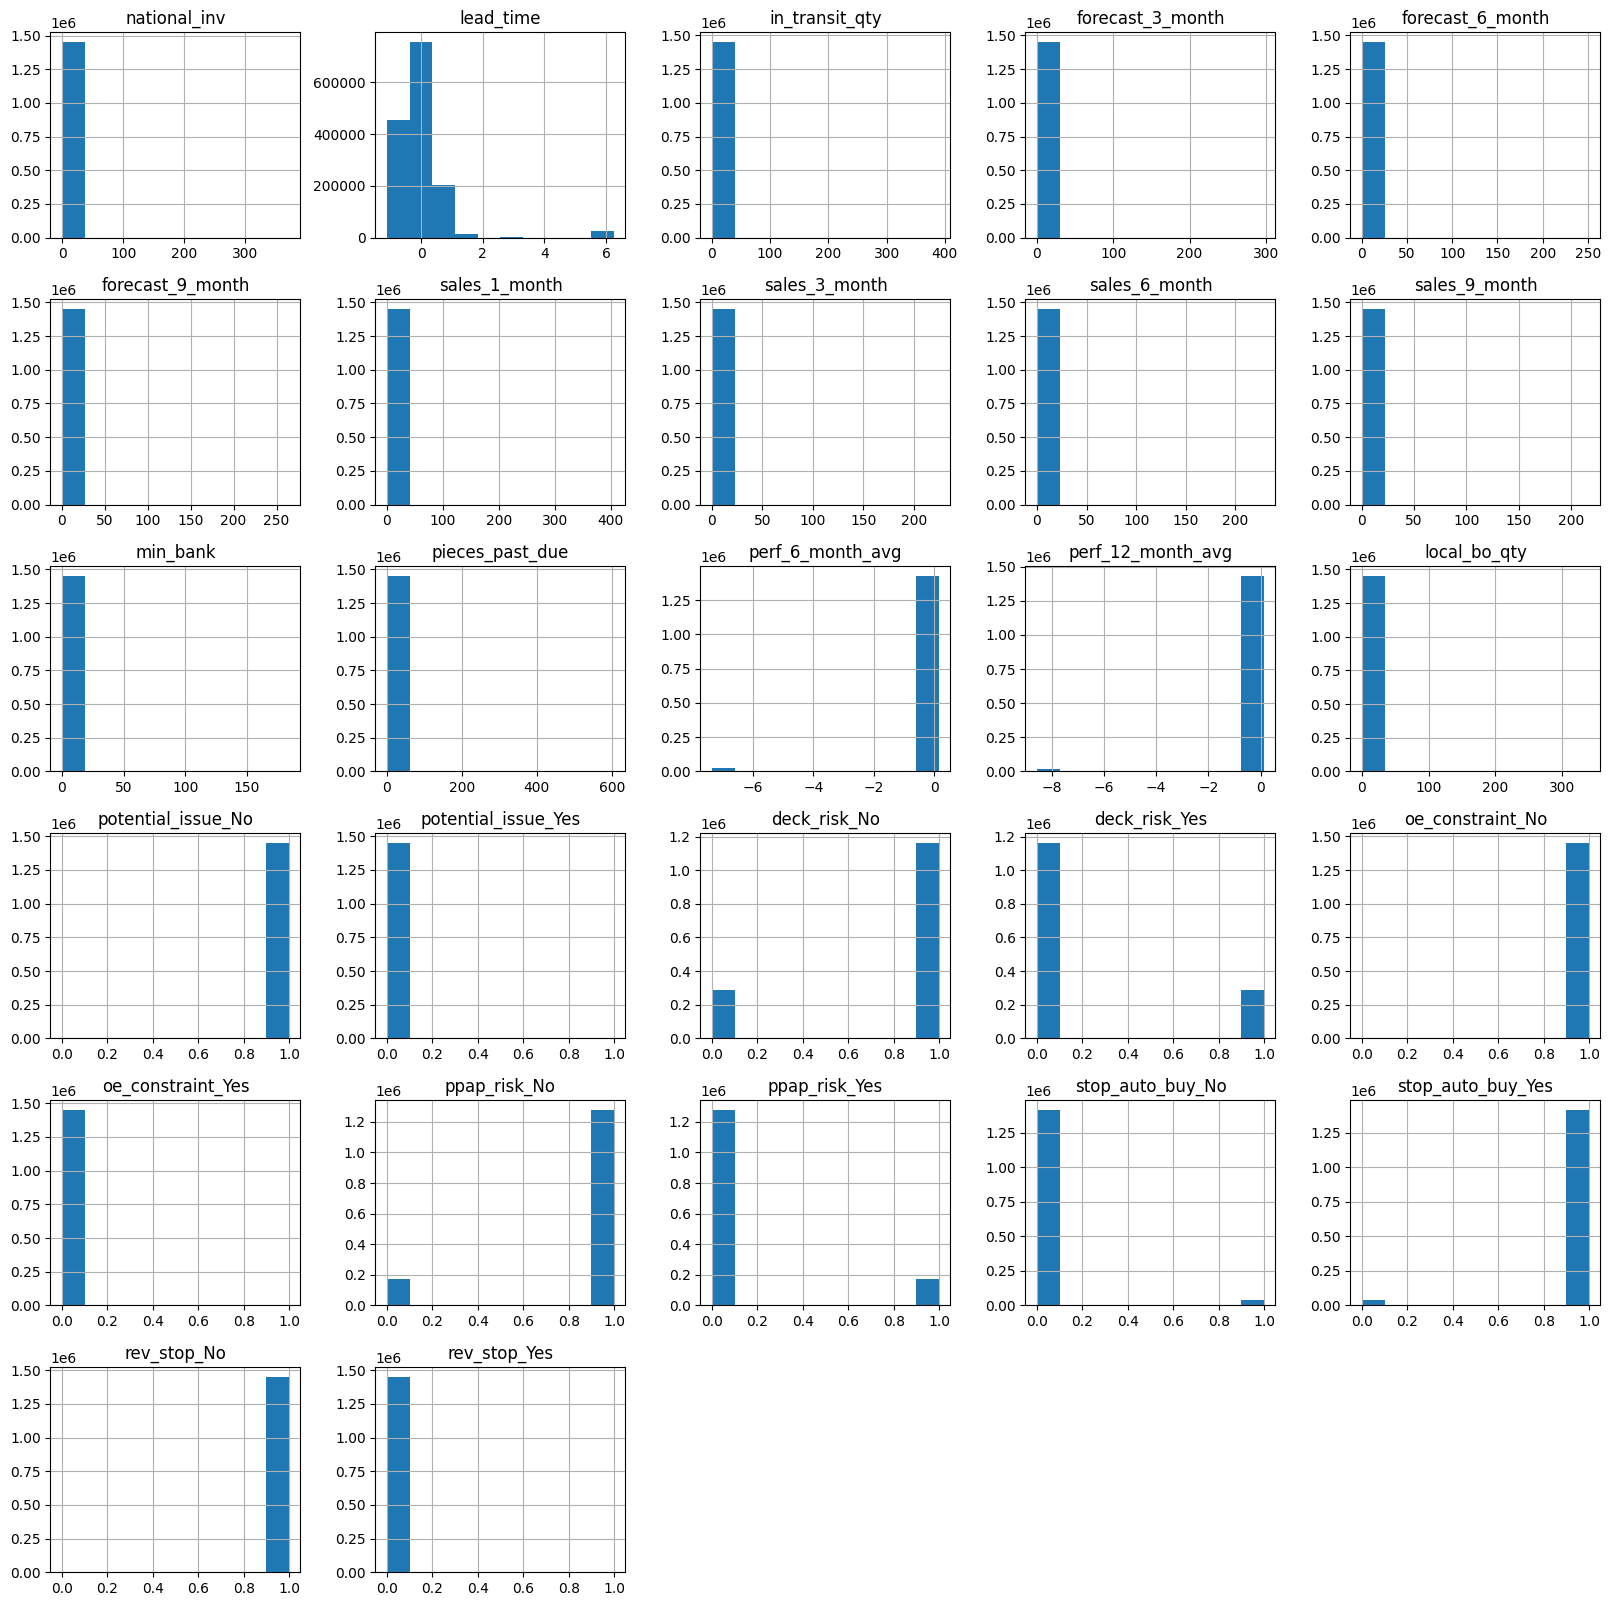

In [ ]:
df_transformed.hist(figsize = (20,20))

In [ ]:
df_transformed.shape

(1451398, 27)

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(random_state=52)
outlier_pred = isolation_forest.fit_predict(df_transformed)

In [ ]:
outlier_pred


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
outlier_pred.shape

(1451398,)

In [ ]:
df_transformed= df_transformed.iloc[outlier_pred ==1]

In [ ]:
df_transformed.shape

(1342364, 27)

In [ ]:
y_train.shape

(1543948,)

In [ ]:
y_train = y_train.iloc[outlier_pred ==1]

IndexError: ignored

## Observation
Dataset doesnot have normal distribution.

# Data Transformation pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(SimpleImputer(missing_values = np.nan,strategy='median'),
                            StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(missing_values = None, strategy = 'most_frequent'),
                            OneHotEncoder(handle_unknown= 'ignore'))
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object))
)
df_tr = preprocessing.fit_transform(X_train)

In [ ]:
df_tr.shape

(1451398, 27)

We have successfully created data transormation pipeline

In [ ]:
df_tr

array([[-0.01496761,  0.01796799, -0.03538205, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01466635, -0.54983983, -0.03538205, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01493748,  0.15991994, -0.03538205, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.01328055, -0.83374374, -0.03538205, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01373244,  0.01796799, -0.02342093, ...,  1.        ,
         1.        ,  0.        ],
       [-0.01502786, -0.69179179, -0.03538205, ...,  1.        ,
         1.        ,  0.        ]])

# Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression
lr = make_pipeline(preprocessing , LinearRegression())

In [ ]:
# lr.fit(df_tr)

In [ ]:
# lr.predict(Y_train)

<Axes: xlabel='lead_time', ylabel='Count'>

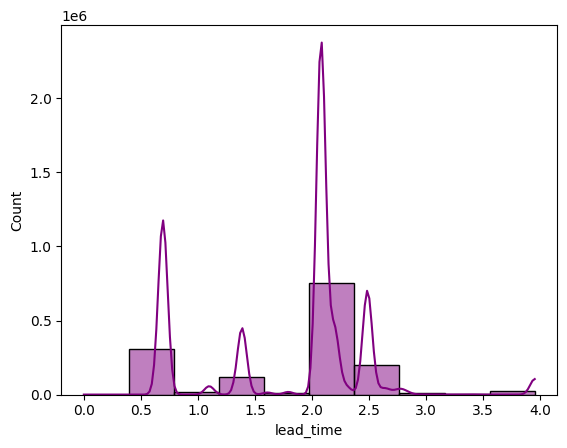

In [ ]:
sns.histplot(X_train['lead_time'].apply(np.log), bins=10, color='purple', kde=True)

<Axes: xlabel='sales_3_month', ylabel='Count'>

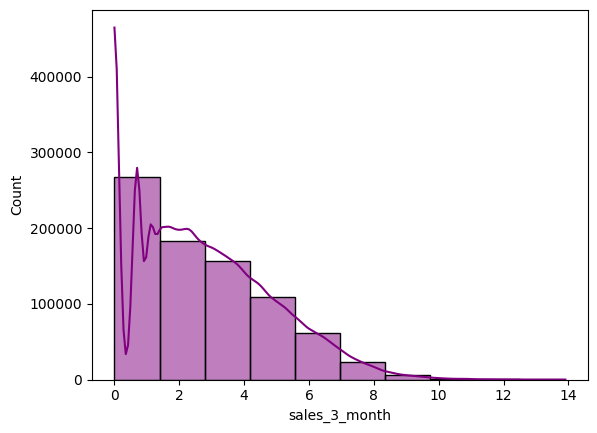

In [ ]:
sns.histplot(X_train['sales_3_month'].apply(np.log), bins=10, color='purple', kde=True)

<Axes: xlabel='lead_time', ylabel='Count'>

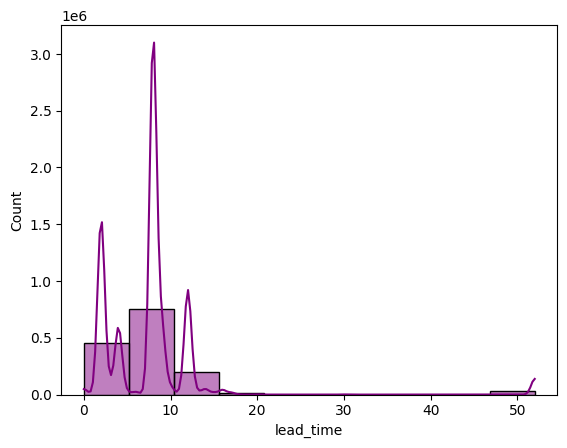

In [ ]:
sns.histplot(X_train['lead_time'], bins=10, color='purple', kde=True)